#### Time series data manipulation in pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


 - pd.Timestamp
 - pd.date_range
 - pd.to_datetime

In [2]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1',periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


In [3]:
etfs = pd.read_csv('ml/ml_assets/etfs.csv',index_col='Dates')
etfs.index = pd.to_datetime(etfs.index)
swda = etfs[['SWDA']]

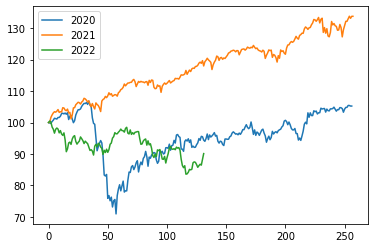

In [12]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2020', '2021','2022']:
    price_per_year = swda.loc[year, ['SWDA']].reset_index(drop=True)
    price_per_year.rename(columns={'SWDA': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot normalized prices
prices.div(prices.loc[0]).mul(100).plot()
plt.show()

In [16]:
prices

,2020,2021,2022
0,56.71,59.31,79.16
1,56.63,59.38,79.53
2,56.54,60.27,79.27
3,56.90,60.74,78.03
4,57.13,61.12,77.49
...,...,...,...
253,59.79,78.89,NaN
254,59.78,79.35,NaN
255,59.68,78.96,NaN
256,59.68,79.34,NaN


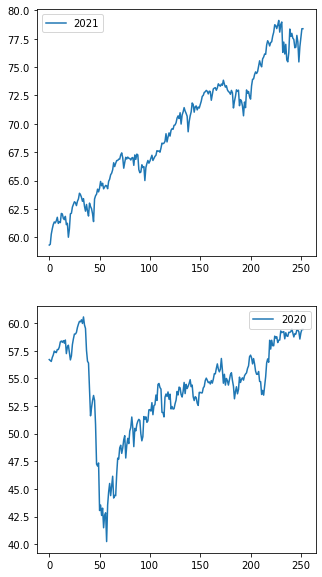

In [21]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
prices.loc[:252].plot(y='2021', ax=axs[0])
prices.loc[:252].plot(y='2020', ax=axs[1])
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2019-07-30 to 2022-07-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SWDA    756 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB
None


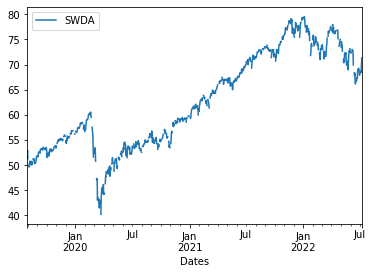

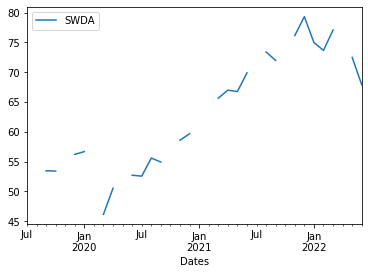

In [5]:
# Inspect data
print(swda.info())

# Set data # set the frequency to calendar daily
swda.asfreq('D').plot(subplots=True)
plt.show()

# Set frequency to monthly
swda.asfreq('M').plot(subplots=True)
plt.show()


<AxesSubplot:>

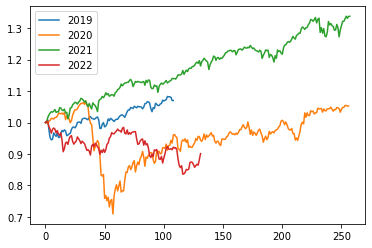